In [140]:
import pandas as pd
import matplotlib.pyplot as plt 

Load Data Files

In [141]:
def load_preprocessed_data(file_path: str) -> pd.DataFrame:
    """Load preprocessed data from a CSV file."""
    return pd.read_csv(file_path)

In [142]:
# Load the preprocessed data
anime_base = load_preprocessed_data('../data/raw/anime-dataset-2023.csv')
watchlist_base = load_preprocessed_data('../data/raw/users-score-2023.csv')

Remove unused columns

In [143]:
anime_filtered = anime_base[['anime_id', 'Name', 'Genres', 'Type', 'Producers', 'Studios']]
watchlist_filtered = watchlist_base[['user_id', 'anime_id', 'rating']]

Plot datasets

In [144]:
watch_counts = watchlist_filtered.groupby('user_id')['anime_id'].nunique()

In [145]:
# Print watchlist stats
def print_watchlist_stats(watchlist):
    watch_counts = watchlist.groupby('user_id')['anime_id'].nunique()
    print(f"Shape of watch counts: {watch_counts.shape}")

    min_watched = watch_counts.min()
    max_watched = watch_counts.max()
    avg_watched = watch_counts.mean()
    
    print(f"Min animes watched: {min_watched}")
    print(f"Max animes watched: {max_watched}")
    print(f"Average animes watched: {avg_watched:.2f}")

    num_active_users = watchlist['user_id'].nunique()
    print(f"Number of active users: {num_active_users}")
    

In [146]:
# Compute thresholds, users with more than 10 watched anime and less than 200 watched anime
lower = 10
upper = 200


print(f"Lower threshold: {lower}")
print(f"Upper threshold: {upper}")

Lower threshold: 10
Upper threshold: 200


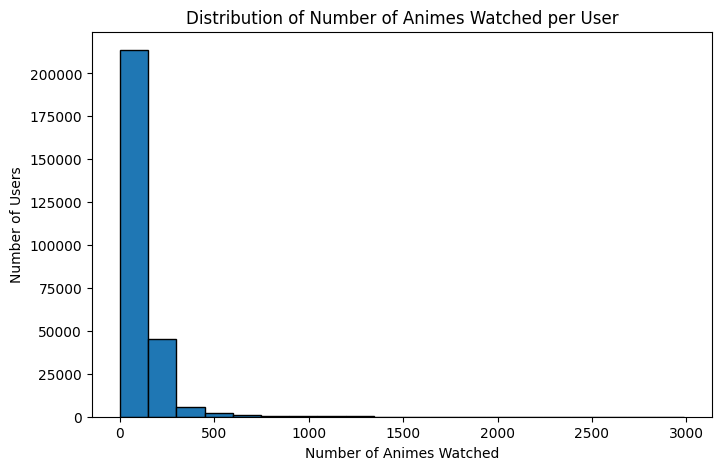

In [147]:
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(watch_counts, bins=20, edgecolor='black')
plt.title("Distribution of Number of Animes Watched per User")
plt.xlabel("Number of Animes Watched")
plt.ylabel("Number of Users")
plt.show()

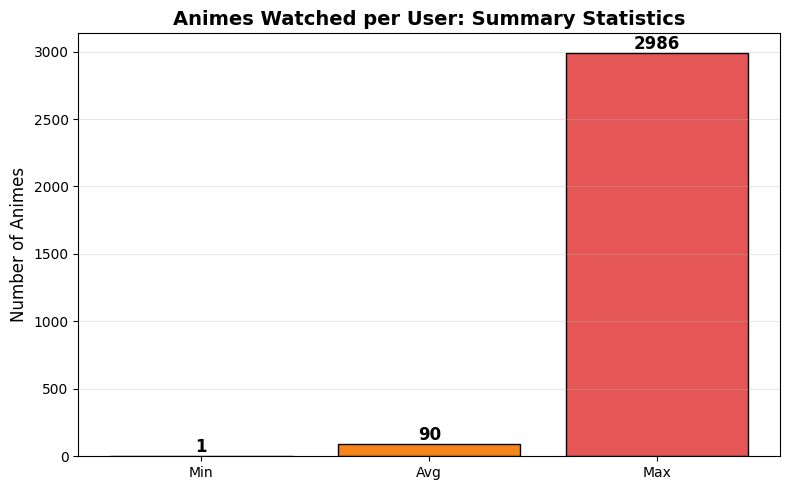

In [148]:
# Plot bar chart of summary statistics
fig, ax = plt.subplots(figsize=(8, 5))
stats_labels = ['Min', 'Avg', 'Max']
stats_values = [min_watched, avg_watched, max_watched]
bars = ax.bar(stats_labels, stats_values, color=['#72B7B2', '#F58518', '#E45756'], edgecolor='black')

# Add value labels on bars
for bar, val in zip(bars, stats_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.0f}' if isinstance(val, (int, float)) else str(val),
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_title('Animes Watched per User: Summary Statistics', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Animes', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Clean the datasets

In [149]:
# Clean duplicates of of user_id and anime_id
watchlist_filtered = watchlist_filtered.drop_duplicates(subset=['user_id', 'anime_id'])

In [150]:
# Filter users who have watched fewer or more than the thresholds
active_users = watch_counts[(watch_counts >= lower) & (watch_counts <= upper)].index
watchlist_cleaned = watchlist_filtered[watchlist_filtered['user_id'].isin(active_users)]

Compare Sizings

In [151]:
print_watchlist_stats(watchlist_base)
print_watchlist_stats(watchlist_cleaned)

Shape of watch counts: (270033,)
Min animes watched: 1
Max animes watched: 2986
Average animes watched: 90.08
Number of active users: 270033
Shape of watch counts: (151902,)
Min animes watched: 10
Max animes watched: 200
Average animes watched: 66.00
Number of active users: 151902


Save as processed

In [152]:
def save_preprocessed_data(df: pd.DataFrame, file_path: str) -> None:
    """Save preprocessed data to a CSV file."""
    df.to_csv(file_path, index=False)

In [153]:
# Save the preprocessed data
save_preprocessed_data(anime_filtered, '../data/clean/anime-dataset-2023.csv')
save_preprocessed_data(watchlist_cleaned, '../data/clean/users-score-2023.csv')